In [4]:
#import necessart libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#Loading Training & Testing data 
d_train=pd.read_csv("/content/drive/MyDrive/Mini Project/Train.csv")
d_test=pd.read_csv('/content/drive/MyDrive/Mini Project/Test.csv')

In [10]:
#Displaying Some Random data
d_train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2576,FDR23,15.85,Low Fat,0.136896,Breads,176.4370,OUT010,1998,NaN,Tier 3,Grocery Store,529.3110
2368,FDC02,21.35,Low Fat,0.068809,Canned,258.5278,OUT035,2004,Small,Tier 2,Supermarket Type1,5206.5560
1093,FDQ46,7.51,Low Fat,0.103793,Snack Foods,110.1544,OUT035,2004,Small,Tier 2,Supermarket Type1,2684.5056
6843,FDH47,13.50,reg,0.129077,Starchy Foods,95.2068,OUT045,2002,NaN,Tier 2,Supermarket Type1,583.2408
5378,NCO07,9.06,Low Fat,0.009776,Others,213.7560,OUT046,1997,Small,Tier 1,Supermarket Type1,1065.2800


# **EXPLORATORY DATA ANALYSIS**

Basic Data Exploration

In [11]:
#Checking Top Values in Data
d_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
#Checking Bottom Values in Data
d_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [13]:
#Checking Number of Observation and Variable
d_train.shape

(8523, 12)

In [14]:
#Info About Variables and their Types
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
#Converting float64 to float Data Type
d_train['Item_Weight']=d_train['Item_Weight'].astype(float)
d_train['Item_Visibility']=d_train['Item_Visibility'].astype(float)
d_train['Item_MRP']=d_train['Item_MRP'].astype(float)
d_train['Item_Outlet_Sales']=d_train['Item_Outlet_Sales'].astype(float)

In [16]:
#Summary of DataSet
d_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Handling Missing Values

In [17]:
#Check for missing values
print("Training Data Null Values")
d_train.isnull().sum()


Training Data Null Values


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
print("Testing Data Null Values")
d_test.isnull().sum()

Testing Data Null Values


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [19]:
#Item_Weight is numerical / Replacing by mean
d_train['Item_Weight'].fillna(d_train['Item_Weight'].mean(),inplace=True)
d_test['Item_Weight'].fillna(d_test['Item_Weight'].mean(),inplace=True)

In [20]:
#Outlet_Size is Categorical / Filling with mode
d_train['Outlet_Size'].mode()
d_train['Outlet_Size'].fillna(d_train['Outlet_Size'].mode()[0],inplace=True)

In [21]:
d_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
d_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
#Check for duplicated Data
print(d_train.duplicated().sum())


0


Handling Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

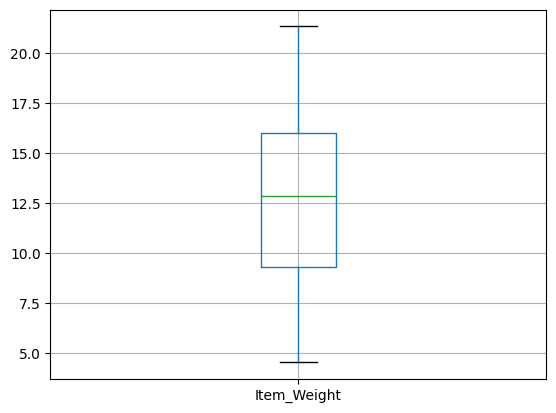

In [24]:
#plotting box plot
d_train.boxplot('Item_Weight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

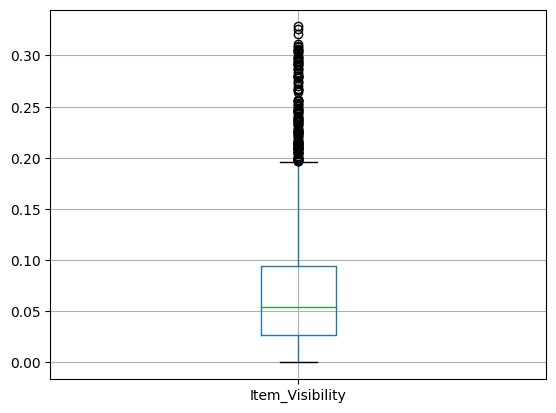

In [25]:
#plotting box plot of item visibility
d_train.boxplot('Item_Visibility')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

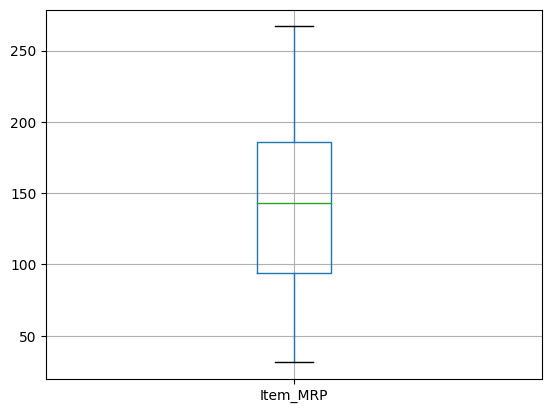

In [26]:
#plotting box plot of item mrp
d_train.boxplot('Item_MRP')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

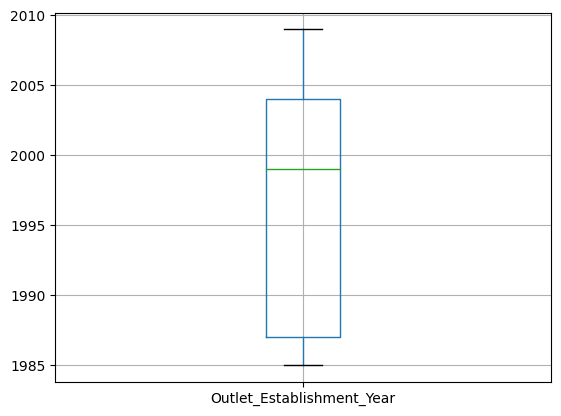

In [27]:
#plotting box plot of outlet establishment year
d_train.boxplot('Outlet_Establishment_Year')
plt.show

Removing Outliers Found in Item Visibility

In [28]:
#Not Droping Values
#Using IQR
#Calculate Q1,Q3,IQR
Q1= d_train['Item_Visibility'].quantile(0.25)
Q3= d_train['Item_Visibility'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)

In [29]:
d_train['Item_Visibility']=np.where(d_train['Item_Visibility']>upper_bound,upper_bound,d_train['Item_Visibility'])
d_train['Item_Visibility']=np.where(d_train['Item_Visibility']<lower_bound,lower_bound,d_train['Item_Visibility'])

<function matplotlib.pyplot.show(close=None, block=None)>

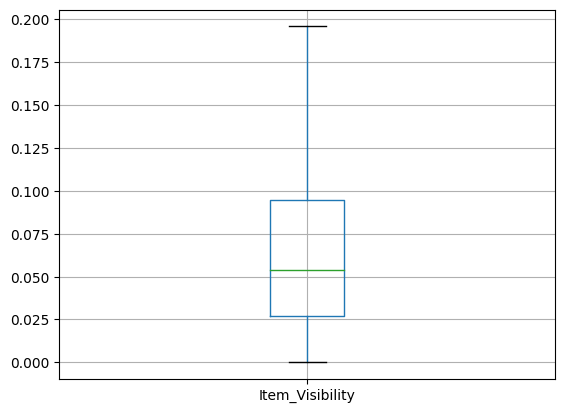

In [30]:
#plotting box plot of Item Visiblity after removing outliers
d_train.boxplot('Item_Visibility')
plt.show

# **Univariate Analysis**

In [31]:
#Finding Datatypes of variables in data set
d_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Visualizing Univariate Continous Data

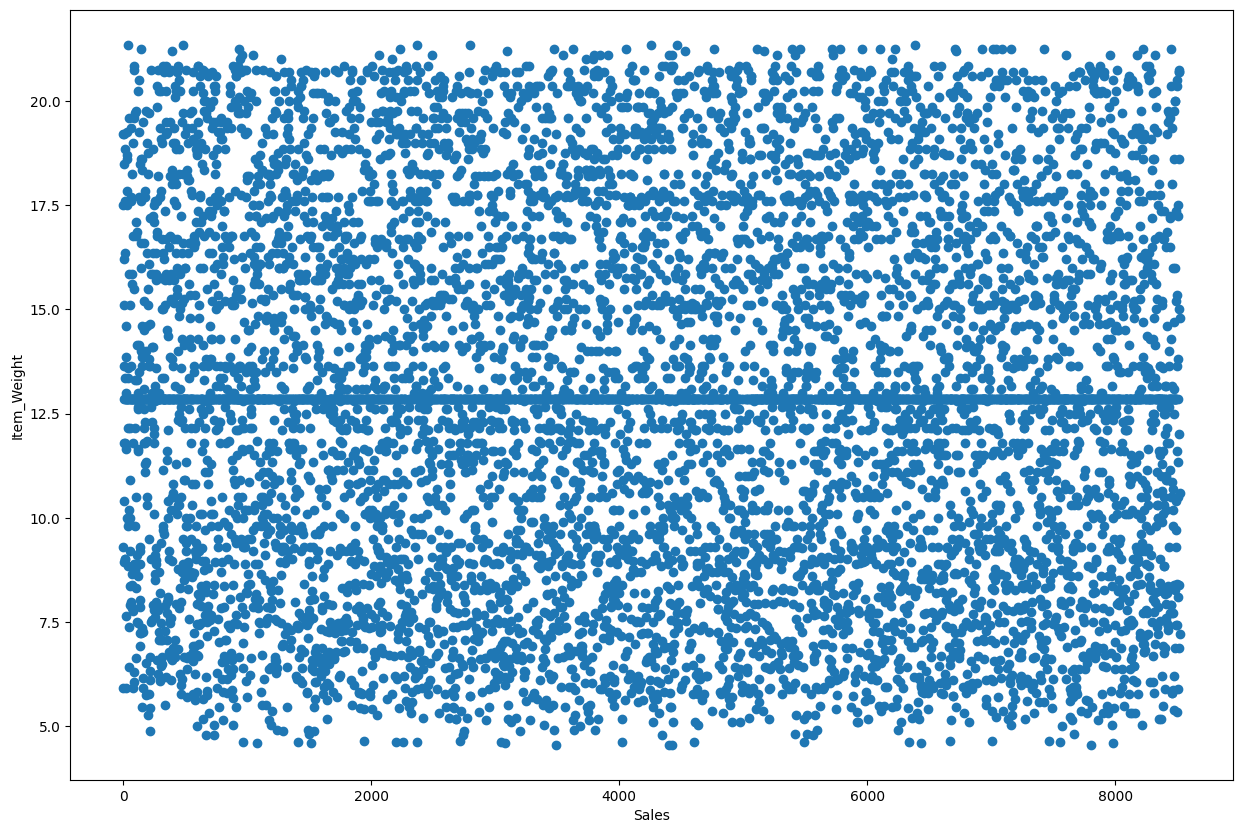

In [32]:
plt.figure(figsize=(15,10))
plt.scatter(d_train.index,d_train['Item_Weight'])
plt.ylabel('Item_Weight')
plt.xlabel('Sales')
plt.show()

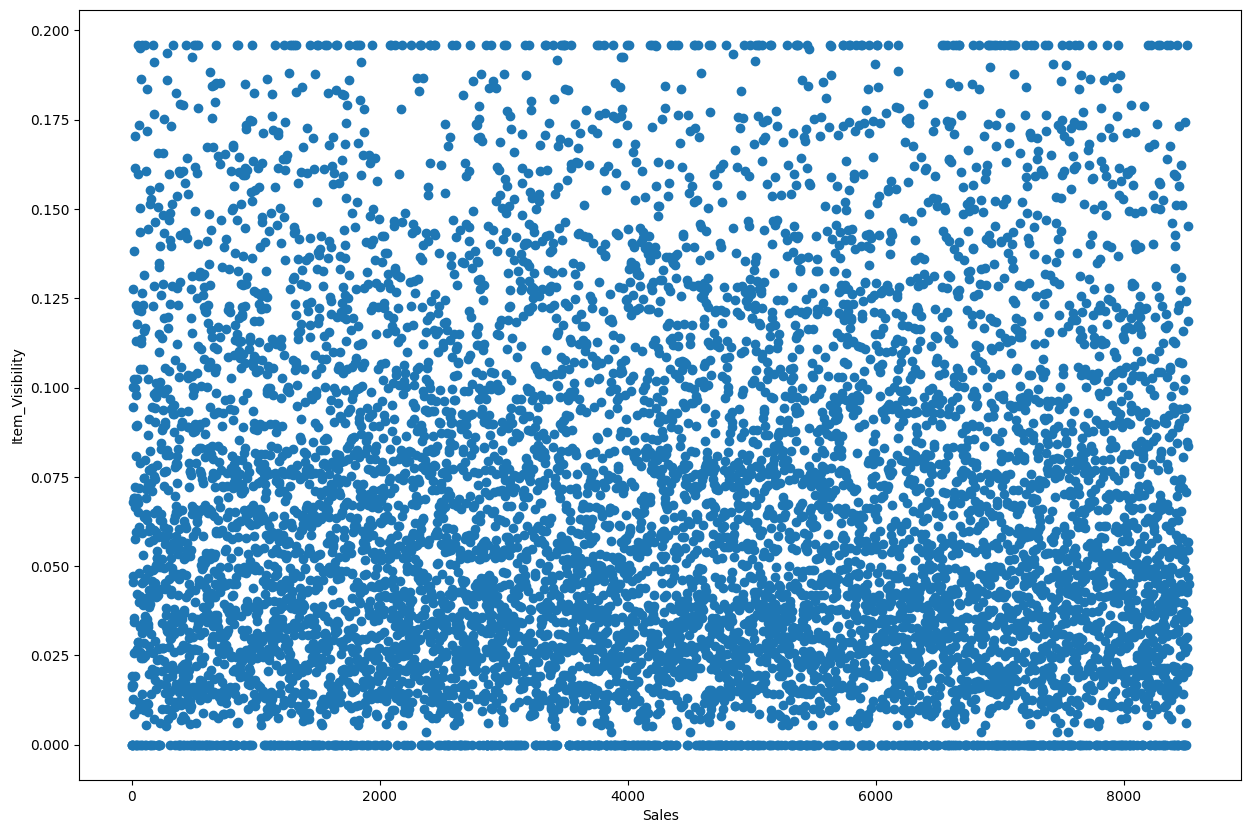

In [33]:
plt.figure(figsize=(15,10))
plt.scatter(d_train.index,d_train['Item_Visibility'])
plt.ylabel('Item_Visibility')
plt.xlabel('Sales')
plt.show()

<Axes: ylabel='Item_Weight'>

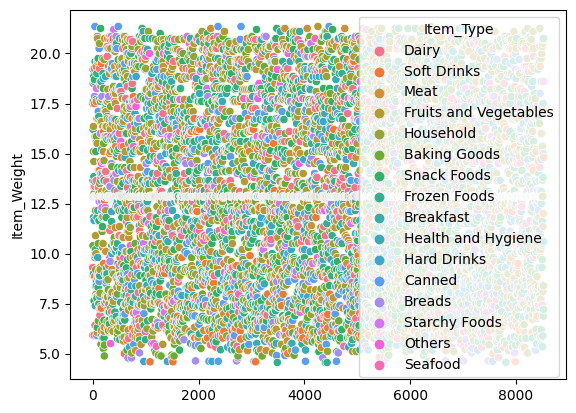

In [34]:
#seaborn scatterplot of Item weight with respect to Item Type
sns.scatterplot(x=d_train.index,y=d_train['Item_Weight'],hue=d_train['Item_Type'])

<Axes: ylabel='Item_Outlet_Sales'>

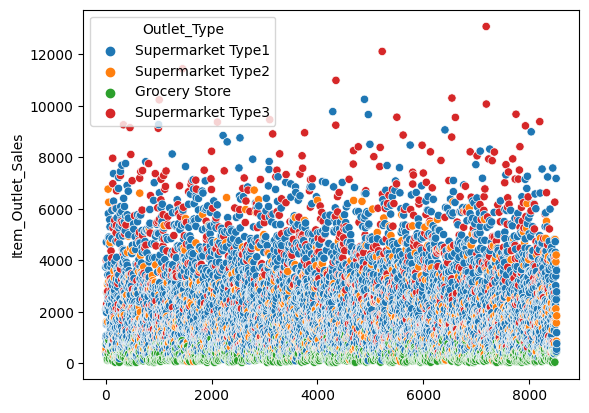

In [35]:
##seaborn scatterplot of Item Outlet Sales with respect to Outlet type
sns.scatterplot(x=d_train.index,y=d_train['Item_Outlet_Sales'],hue=d_train['Outlet_Type'])

<Axes: ylabel='Item_Outlet_Sales'>

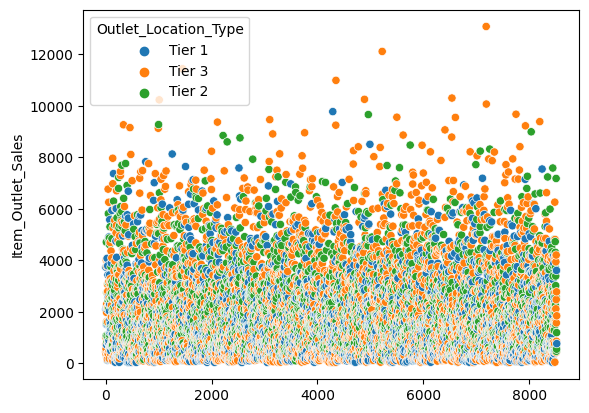

In [36]:
#seaborn scatterplot of Item Outlet Sales with respect to Outlet Location type
sns.scatterplot(x=d_train.index,y=d_train['Item_Outlet_Sales'],hue=d_train['Outlet_Location_Type'])

<Axes: ylabel='Item_Outlet_Sales'>

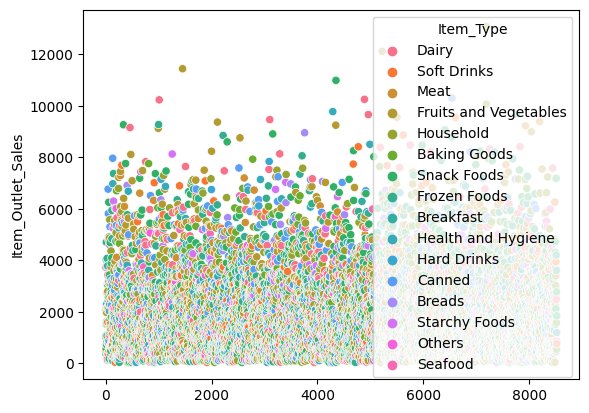

In [37]:
#seaborn scatterplot of Item Sales with respect to Item Type
sns.scatterplot(x=d_train.index,y=d_train['Item_Outlet_Sales'],hue=d_train['Item_Type'])

<Axes: ylabel='Item_Visibility'>

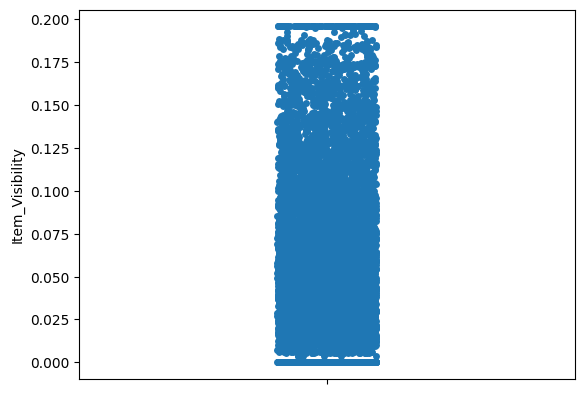

In [38]:
sns.stripplot(d_train['Item_Visibility'])

(array([ 483.,  870.,  865.,  664., 2242.,  629.,  755.,  735.,  677.,
         603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

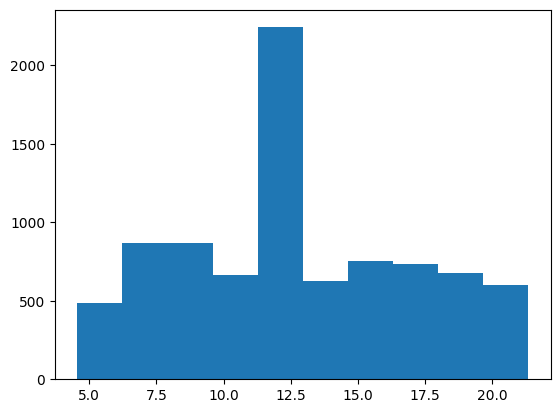

In [39]:
#Histogram For Item Weight
plt.hist(d_train['Item_Weight'])

<ipython-input-40-a27e3467656a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_train['Item_Outlet_Sales'],kde=False,bins=18)


<Axes: xlabel='Item_Outlet_Sales'>

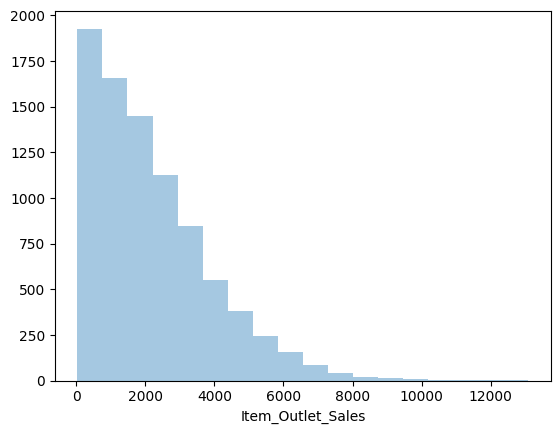

In [40]:
#Histogram For Item Visibility
sns.distplot(d_train['Item_Outlet_Sales'],kde=False,bins=18)

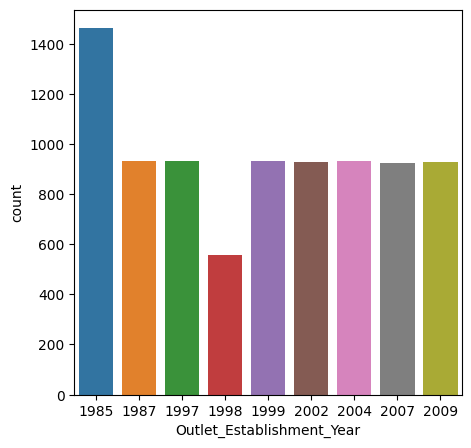

In [41]:
# Histogram for Outlet_Establishment_Year 
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Establishment_Year', data=d_train)
plt.show()

<ipython-input-42-e4604150d635>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_train['Item_Outlet_Sales'],kde=False,bins=12)


<Axes: xlabel='Item_Outlet_Sales'>

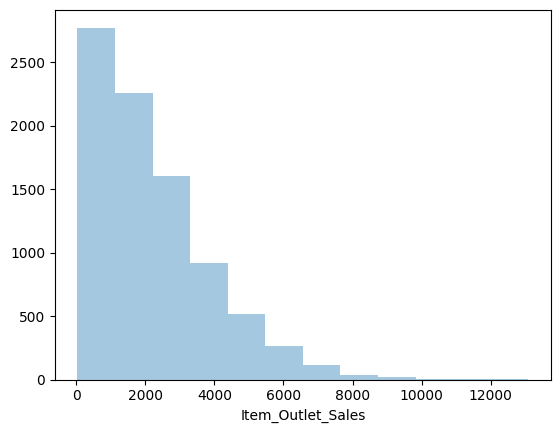

In [42]:
#Histogram For Item MRP
sns.distplot(d_train['Item_Outlet_Sales'],kde=False,bins=12)

<ipython-input-43-f1ad9ba6f9d0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_train['Item_Outlet_Sales'],kde=False,bins=15)


<Axes: xlabel='Item_Outlet_Sales'>

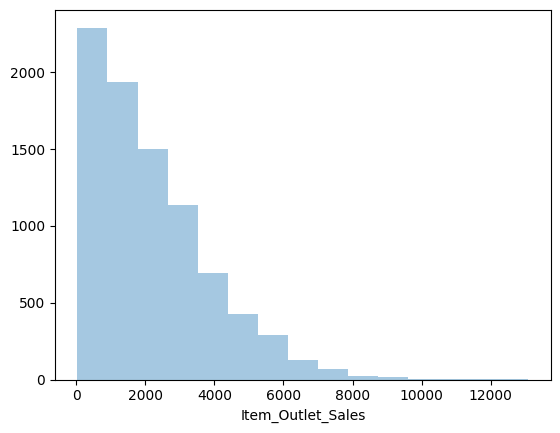

In [43]:
#Histogram For Item Sales
sns.distplot(d_train['Item_Outlet_Sales'],kde=False,bins=15)

<Axes: >

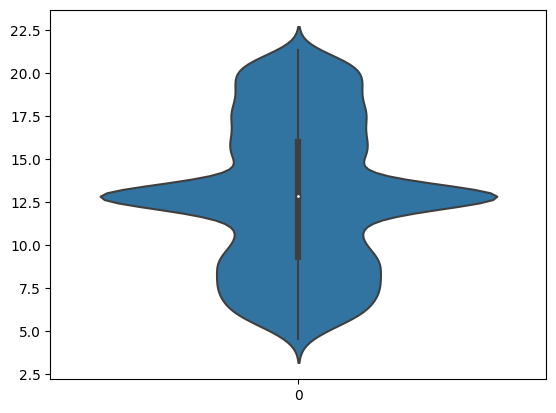

In [44]:
#sns Violin Plot 
sns.violinplot(d_train['Item_Weight'],orient='vertical')

<Axes: >

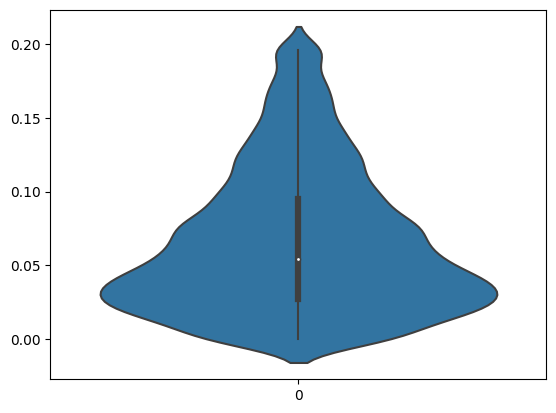

In [45]:
#sns Violin Plot 
sns.violinplot(d_train['Item_Visibility'],orient='vertical')

<Axes: >

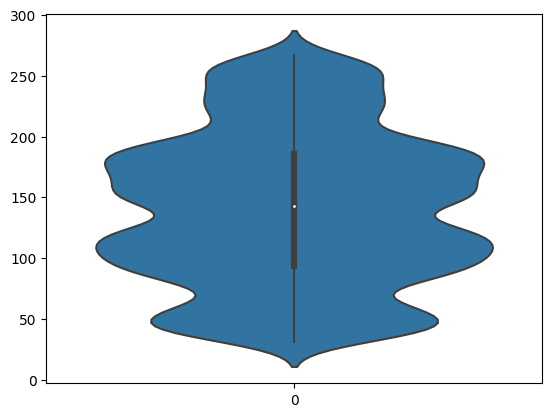

In [46]:
#sns Violin Plot 
sns.violinplot(d_train['Item_MRP'],orient='vertical')

<Axes: >

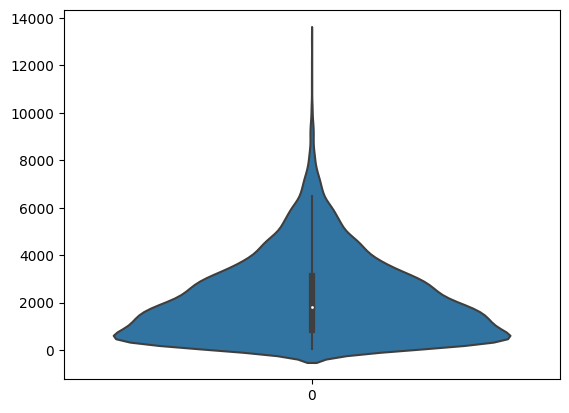

In [47]:
#sns Violin Plot 
sns.violinplot(d_train['Item_Outlet_Sales'],orient='vertical')

Visulizing Categorical Values

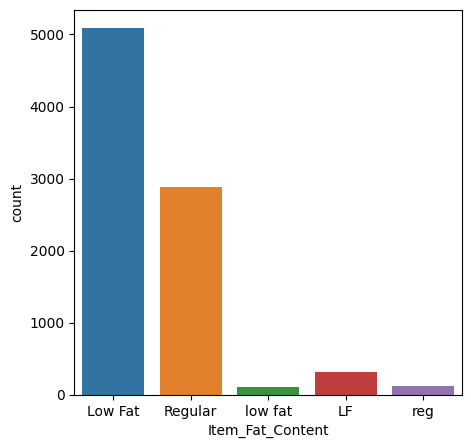

In [48]:
# Box Plot For Item_Fat_Content 
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=d_train)
plt.show()

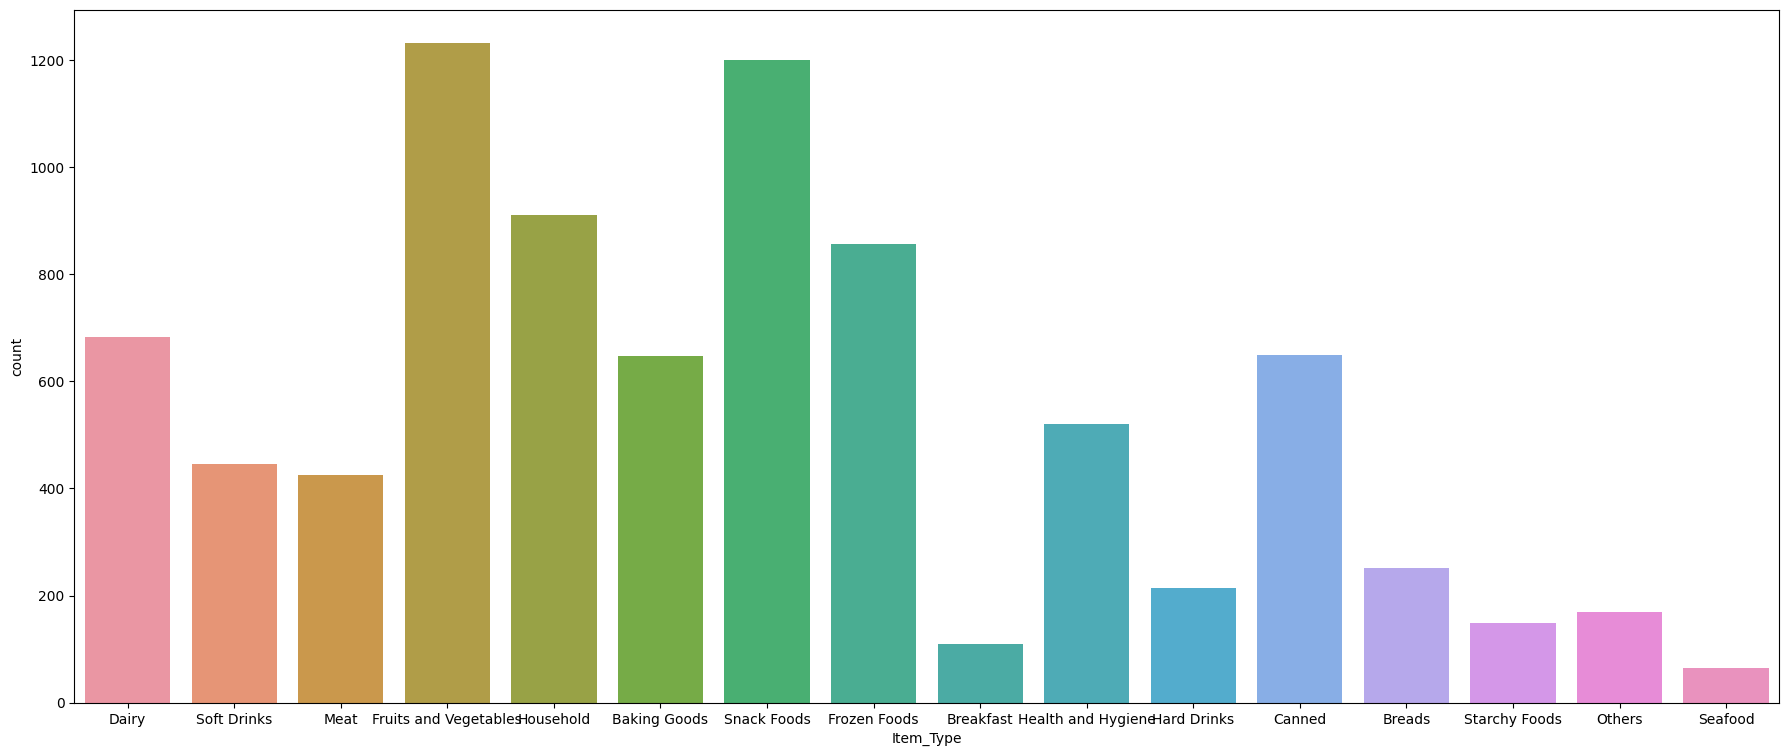

In [49]:
# Box Plot For Item Type 
plt.figure(figsize=(22,9))
sns.countplot(x='Item_Type', data=d_train)
plt.show()

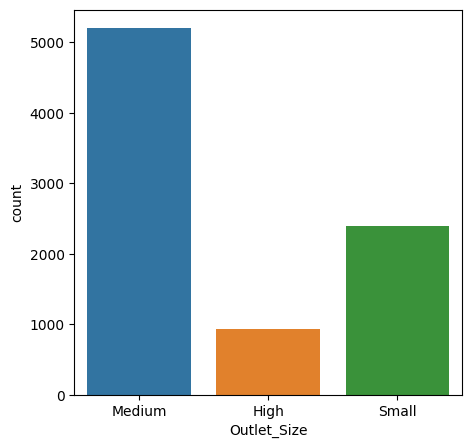

In [50]:
#Box Plot for Outlet Size
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Size', data=d_train)
plt.show()

([<matplotlib.patches.Wedge at 0x7f0f1f8e2d70>,
 [Text(0.36266446547093334, 1.03849626166139, 'Tier 1'),
  Text(-1.0315659207596939, -0.3819316053002228, 'Tier 2'),
  Text(0.7006790317242327, -0.8479675079282176, 'Tier 3')])

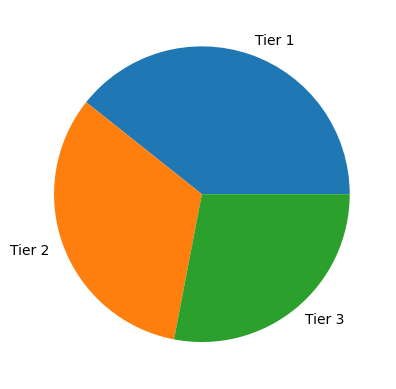

In [51]:
plt.pie(d_train['Outlet_Location_Type'].value_counts(),labels=['Tier 1','Tier 2','Tier 3'])

<Axes: >

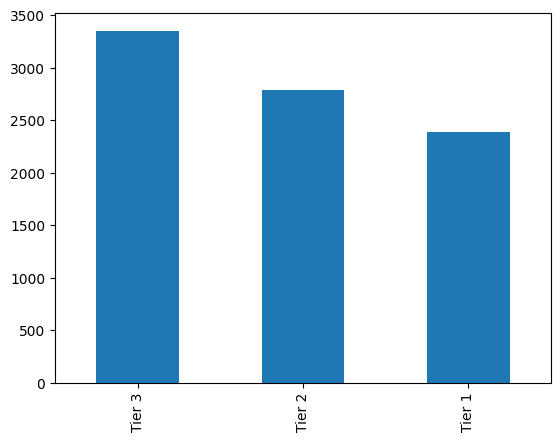

In [52]:
d_train['Outlet_Location_Type'].value_counts().plot.bar()

([<matplotlib.patches.Wedge at 0x7f0f1deaab60>,
 [Text(-0.5127275930542571, 0.9731959799140091, 'SuperMarket Type1'),
  Text(-0.22048660527398525, -1.0776760445025926, 'SuperMarket Type 2'),
  Text(0.5674626423181808, -0.9423301701491196, 'Grocery Store'),
  Text(1.0362713621111401, -0.3689737986203392, 'SuperMarket Type 3')])

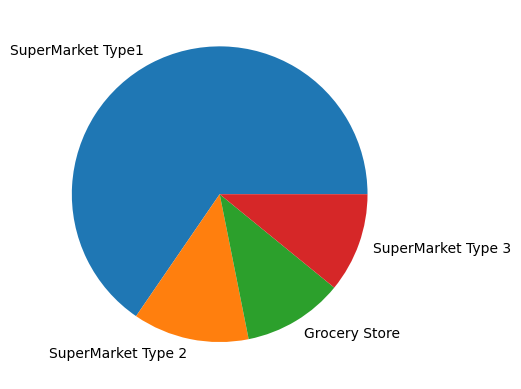

In [53]:
plt.pie(d_train['Outlet_Type'].value_counts(),labels=['SuperMarket Type1','SuperMarket Type 2','Grocery Store','SuperMarket Type 3'])

# **Bivariate Analysis**

In [54]:
#Correlation Matrix
d_train.corr()

<ipython-input-54-b8c92105cbca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d_train.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011928,0.024756,-0.008301,0.011550
Item_Visibility,-0.011928,1.000000,-0.001163,-0.064105,-0.117918
Item_MRP,0.024756,-0.001163,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.064105,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.117918,0.567574,-0.049135,1.000000


Text(0, 0.5, 'Outlet Sales')

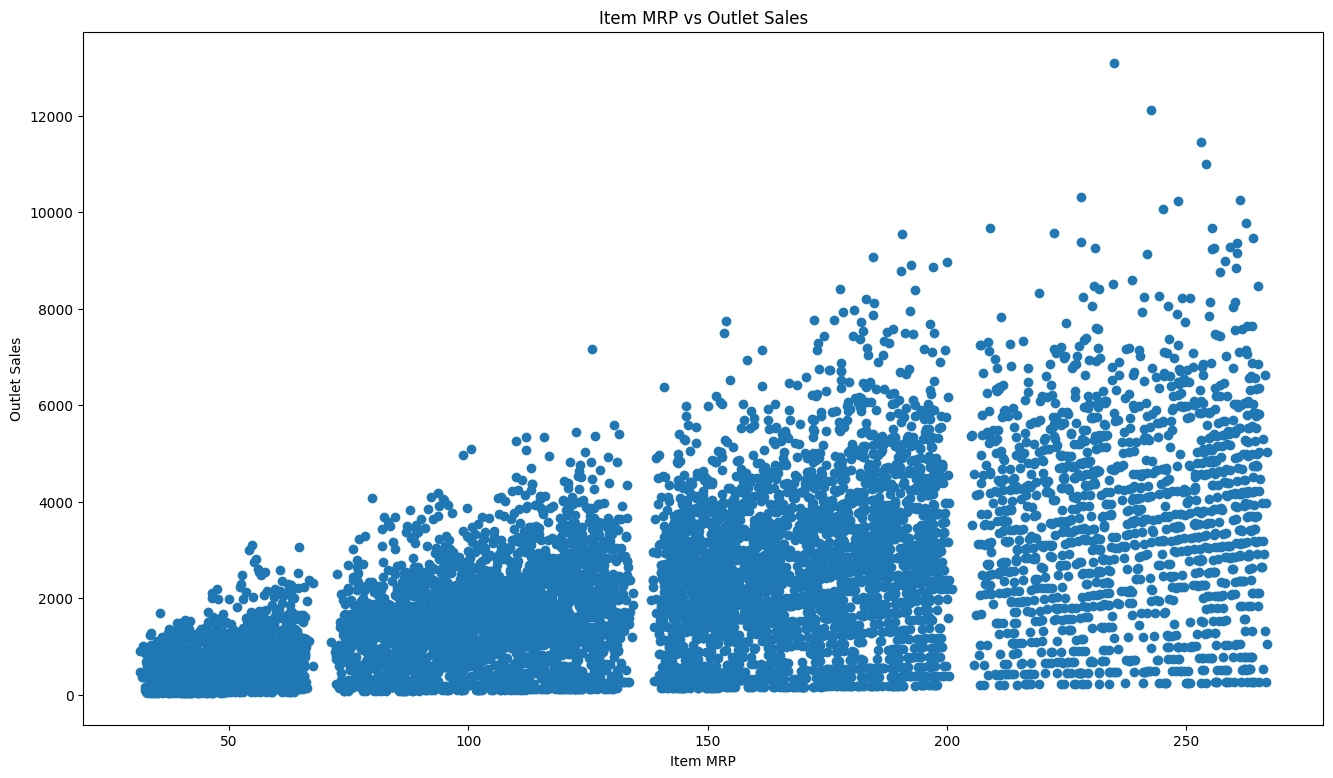

In [55]:
plt.figure(figsize=(16,9))
plt.scatter(d_train['Item_MRP'],d_train['Item_Outlet_Sales'])
plt.title("Item MRP vs Outlet Sales")
plt.xlabel('Item MRP')
plt.ylabel('Outlet Sales')

# **Feature Engineering**

Label Encoding

In [56]:
#initialize Encoder
le=LabelEncoder()

In [57]:
# Transforming Categorical Variables (Item_Fat_Content, Outlet_Size & Outlet_Type)
d_train['Item_Fat_Content']= le.fit_transform(d_train['Item_Fat_Content'])
d_train['Item_Type']= le.fit_transform(d_train['Item_Type'])
d_train['Outlet_Size']= le.fit_transform(d_train['Outlet_Size'])
d_train['Outlet_Location_Type']= le.fit_transform(d_train['Outlet_Location_Type'])
d_train['Outlet_Type']= le.fit_transform(d_train['Outlet_Type'])

In [58]:
#Showing Data
d_train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5043,DRD12,12.857645,1,0.000000,14,89.4146,OUT027,1985,1,2,3,2645.2234
3756,FDE45,12.100000,1,0.040522,6,178.5002,OUT018,2009,1,2,2,5552.1062
6874,NCM17,7.930000,1,0.071426,8,45.9086,OUT018,2009,1,2,2,1070.6064
4172,NCX06,17.600000,1,0.015751,9,182.5976,OUT018,2009,1,2,2,1629.8784
5102,FDR01,5.405000,2,0.053840,3,198.6742,OUT018,2009,1,2,2,2388.8904


Preprocessing Data

In [59]:
#Dropping unnecessary columns in train and test datasets
d_train=d_train.drop(['Item_Identifier','Outlet_Identifier'], axis=1)

In [60]:
#Splitting Data into test and train
A=d_train.drop('Item_Outlet_Sales',axis=1)
B=d_train['Item_Outlet_Sales']
x_train, x_test, y_train, y_test = train_test_split(A,B, random_state=3, test_size=0.25)


In [61]:
print(x_train.shape,x_test.shape)

(6392, 9) (2131, 9)


In [62]:
print(y_train.shape,y_test.shape)

(6392,) (2131,)


In [63]:
x_train.sample(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6187,16.7,2,0.052708,5,114.7176,2007,1,1,1
1098,17.5,1,0.026925,5,264.3910,2002,1,1,1


In [64]:
y_train.sample(2)

1546    2050.6640
7337    1134.5232
Name: Item_Outlet_Sales, dtype: float64

# **MODELLING**

In [65]:
#Fit Linear Regression to dataset
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
#Predicting Outlet sales value for xtest
predict=lr.predict(x_test)
predict

array([2504.81668465, 1340.50120948, 1267.99792881, ..., 4411.21061539,
       2570.52696092, 1219.83316644])

In [67]:
#Calculate RMSE for this model
print(math.sqrt(mean_squared_error(y_test,predict)))

1159.8475272989085


In [68]:
#Calculate R2 Score
print((r2_score(y_test,predict)))

0.536030807203649


In [69]:
#Calculate Mean Absolute Error
print((mean_absolute_error(y_test,predict)))

875.0953149617444


**Random Forest Regression**

In [78]:
#Random Forest Regressor
rf=RandomForestRegressor(n_estimators=500)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [79]:
#Predicting
pred=rf.predict(x_test)

In [80]:
#Calculate RMSE for this model
print(math.sqrt(mean_squared_error(y_test,pred)))

1106.7779753238804


In [81]:
#Calculate R2 Score
print((r2_score(y_test,pred)))

0.5775178553060876


In [82]:
#Calculate Mean Absolute Error
print((mean_absolute_error(y_test,pred)))

779.5082377732521


**XGB Regression**

In [83]:
#initializing
xgr=XGBRegressor()
#fitting model 
xgr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [84]:
#Predicting
y_pred=xgr.predict(x_test)

In [85]:
#Calculate RMSE for this model
print(math.sqrt(mean_squared_error(y_test,y_pred)))

1147.4068978411387


In [86]:
#Calculate R2 Score
print(r2_score(y_test,y_pred))

0.5459305790379425


In [87]:
#Calculate Mean Absolute Error
print(mean_absolute_error(y_test,y_pred))

812.3961341830244


**Final Predication and Best Model Found (Random Forest Regressor)**

In [88]:
#predict the test set
f_pred = rf.predict(x_test)

In [89]:
f_pred

array([2977.8863752, 1639.2901488,  723.6100824, ..., 4300.20246  ,
       3434.7183872, 1850.6004212])

**Displaying & Storing Predicted Values in Data Frame**

In [90]:
d=pd.read_csv('/content/drive/MyDrive/Mini Project/Train.csv')

In [91]:
selected_col=['Item_Identifier','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Size','Outlet_Type']
dm=d[selected_col].copy()

In [92]:
res = pd.concat([pd.DataFrame(dm.values, columns=dm.columns), pd.DataFrame(y_test.values, columns=['Actual']),pd.DataFrame(f_pred, columns=['Predicted'])], axis=1)

In [93]:
res.head(10)

,Item_Identifier,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Size,Outlet_Type,Actual,Predicted
0,FDA15,Dairy,249.8092,Tier 1,Medium,Supermarket Type1,2865.6032,2977.886375
1,DRC01,Soft Drinks,48.2692,Tier 3,Medium,Supermarket Type2,2607.2728,1639.290149
2,FDN15,Meat,141.618,Tier 1,Medium,Supermarket Type1,372.8480,723.610082
3,FDX07,Fruits and Vegetables,182.095,Tier 3,NaN,Grocery Store,850.8924,1773.817702
4,NCD19,Household,53.8614,Tier 3,High,Supermarket Type1,164.4526,532.827756
5,FDP36,Baking Goods,51.4008,Tier 3,Medium,Supermarket Type2,1043.9744,716.074558
6,FDO10,Snack Foods,57.6588,Tier 3,High,Supermarket Type1,1798.9916,2040.531856
7,FDP10,Snack Foods,107.7622,Tier 3,Medium,Supermarket Type3,2518.7214,1635.873263
8,FDH17,Frozen Foods,96.9726,Tier 2,NaN,Supermarket Type1,633.8416,1226.186549
9,FDU28,Frozen Foods,187.8214,Tier 2,NaN,Supermarket Type1,3749.7856,1758.475007
